In [1]:
from collections import deque

In [2]:
import nbimporter
from fct_usuelles import lire_graphe, afficher_graphe, visualiser_graphe_par_etape

prends en paramètre un graphe dans un état (càd avec des sommets brulés) et retourne le graphe dans l'état suivante

In [3]:
def successeurs(etat, graphe):
    """
    Retourne les successeurs (voisins) d'un sommet donné.
    :param etat: Sommet actuel.
    :param graphe: Liste d'adjacence du graphe.
    :return: Liste des successeurs sous la forme (action, successeur).
    """
    return [(1, voisin) for voisin in graphe.get(etat, [])]  # Coût de chaque déplacement = 1



In [4]:
def successeurs_non_touches(etat, graphe, sommets_brules):
    """
    Retourne les successeurs (voisins non brûlés et voisins non prioritaires).
    Si aucun successeur n'est disponible, retourne les voisins brûlés.
    :param etat: Sommet actuel.
    :param graphe: Liste d'adjacence du graphe.
    :param sommets_brules: Ensemble des sommets brûlés ou touchés.
    :return: Liste des successeurs sous la forme (action, successeur).
    """
    # Récupérer tous les voisins des sommets brûlés
    voisins_brules = set()
    for sommet in sommets_brules:
        voisins_brules.update(graphe.get(sommet, []))  # Ajouter tous les voisins des sommets brûlés

    # Trouver les voisins du sommet actuel
    voisins = graphe.get(etat, [])
    
    # Étape 1 : Successeurs qui ne sont ni brûlés ni voisins des brûlés
    non_touches = [voisin for voisin in voisins if voisin not in sommets_brules and voisin not in voisins_brules]

    if non_touches:
        # Si des successeurs valides existent, les retourner
        return [(1, voisin) for voisin in non_touches]
    else:
        # Sinon, retourner les voisins du sommet actuel qui ne sont pas encore brûlés
        return [(1, voisin) for voisin in voisins if voisin not in sommets_brules]


test_but : vérifie si tout les sommets sont brulées

In [5]:
def test_tout_brule(sommets_brules, graphe):
    """
    Vérifie si tous les sommets du graphe ont été brûlés.
    :param sommets_brules: Ensemble des sommets brûlés ou touchés.
    :param graphe: Liste d'adjacence du graphe.
    :return: True si tous les sommets sont brûlés, sinon False.
    """
    return len(sommets_brules) == len(graphe)


In [6]:
def test_but(etat, graphe, chemin):
    """
    Vérifie si tous les sommets du graphe ont été brûlés.
    :param etat: État courant.
    :param graphe: Liste d'adjacence du graphe.
    :param chemin: Chemin actuel parcouru.
    :return: True si tous les sommets sont brûlés, sinon False.
    """
    sommets_brules = set(chemin)
    return len(sommets_brules) == len(graphe)


## 1ère méthode

In [7]:
def recherche(etat_initial, successeurs, test_but, cout_action=None):
    """
    Algorithme générique de recherche.

    :param etat_initial: État de départ.
    :param successeurs: Fonction qui retourne les états accessibles depuis un état donné.
    :param test_but: Fonction qui vérifie si tous les sommets sont brûlés.
    :param cout_action: Fonction optionnelle pour calculer le coût d'une action. Par défaut : pas de coût.
    :return: Chemin vers l'état terminal, coût total.
    """
    # Initialisation : créer la liste des noeuds à traiter
    noeuds_a_traiter = deque([{"etat": etat_initial, "chemin": [etat_initial], "cout": 0}])  # File ou pile
    sommets_brules = set()  # Ensemble des sommets brûlés

    while noeuds_a_traiter:
        # Extraire un nœud
        noeud = noeuds_a_traiter.pop()
        sommets_brules.add(noeud["etat"])  # Marquer le sommet comme brûlé

        # Vérifier si tous les sommets sont brûlés (objectif atteint)
        if test_but(sommets_brules):
            return noeud["chemin"], noeud["cout"]

        # Générer les successeurs
        for action, prochain_etat in successeurs(noeud["etat"], sommets_brules):
            if prochain_etat not in sommets_brules:  # Vérification supplémentaire
                nouveau_chemin = noeud["chemin"] + [prochain_etat]
                nouveau_cout = noeud["cout"] + (cout_action(action) if cout_action else 0)

                # Ajouter le nouveau nœud à la liste des noeuds à traiter
                noeuds_a_traiter.append({"etat": prochain_etat, "chemin": nouveau_chemin, "cout": nouveau_cout})

    # Si on a parcouru tous les nœuds sans brûler tout le graphe
    return None, float("inf")

### main

In [8]:
def main(fichier_graphe):
    # Lecture du graphe
    graphe = lire_graphe(fichier_graphe)

    # Déterminer le sommet de départ (celui avec le plus de voisins)
    sommet_depart = max(graphe, key=lambda sommet: len(graphe[sommet]))
    
    # Appliquer l'algorithme générique de recherche
    chemin, cout = recherche(
        etat_initial=sommet_depart,
        successeurs=lambda etat, sommets_brules: successeurs_non_touches(etat, graphe, sommets_brules),
        test_but=lambda sommets_brules: test_tout_brule(sommets_brules, graphe),
        cout_action=None
    )
    
    # Résultat
    if chemin:
        print("\nChemin trouvé :")
        print(f"Chemin : {chemin}")
        print(f"Coût total : {cout}")
    else:
        print("\nAucun chemin trouvé pour brûler tous les sommets.")

In [9]:
#fichier = 'instances\Stranke94\Stranke94.mtx'
#fichier = 'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.edges'
fichier = 'instances\karate\karate.mtx'
#fichier = 'instances\fb-pages-government\fb-pages-government.edges'

if __name__ == '__main__':
    main(fichier)


Chemin trouvé :
Chemin : [34, 33, 15]
Coût total : 0


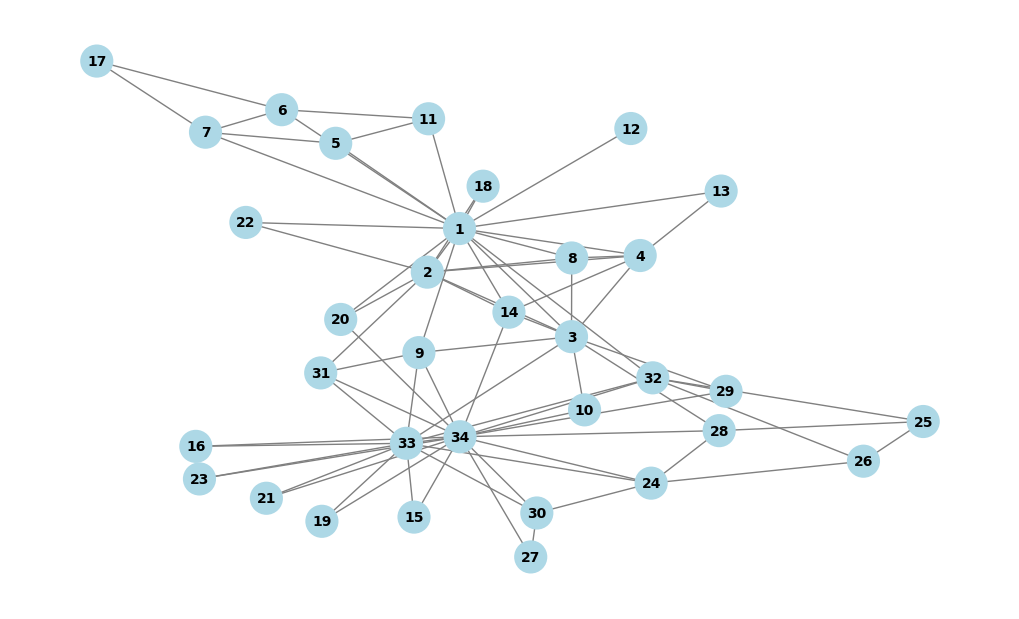

In [10]:
# Charger un graphe avec la fonction lire_graphe
graphe = lire_graphe(fichier)

afficher_graphe(graphe)


dire un sommet va etre brulé au 3 tour par exemple
notre solution (du 2eme algo) sera le  centre (sommet) de la boule ayant le rayon le plus grand

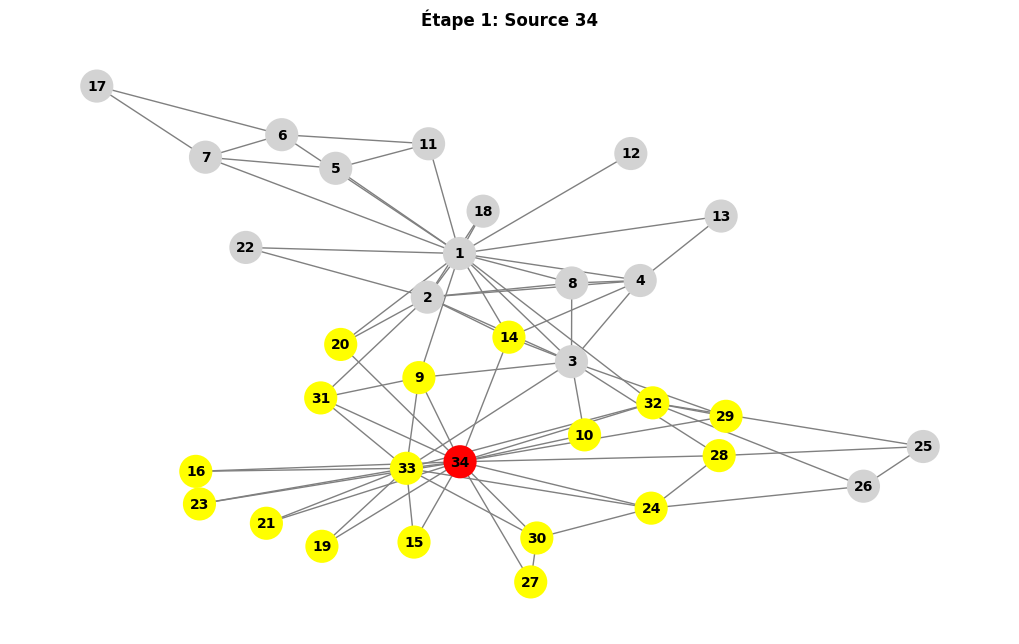

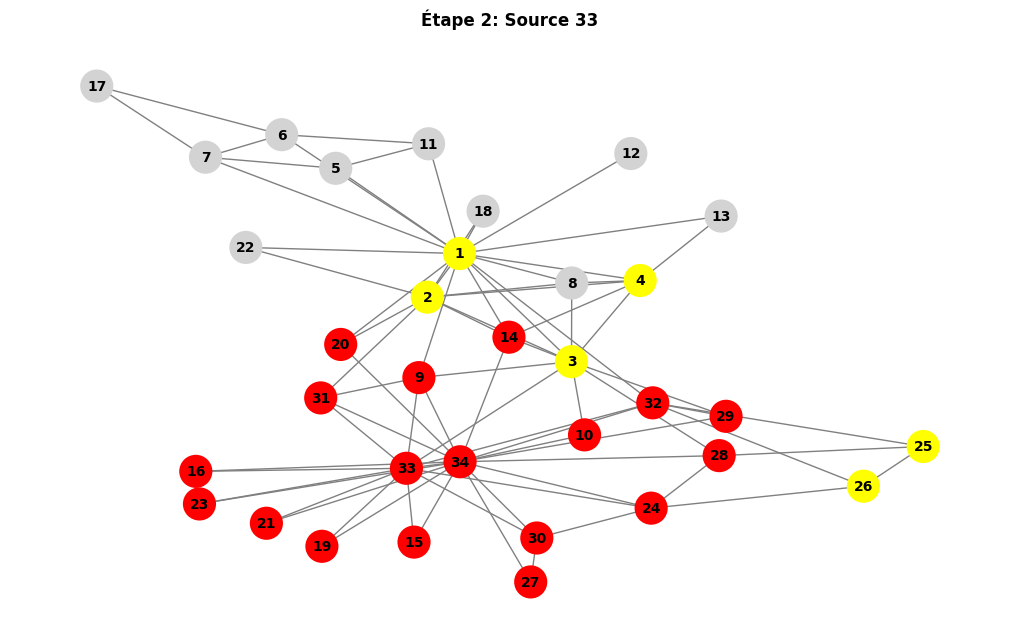

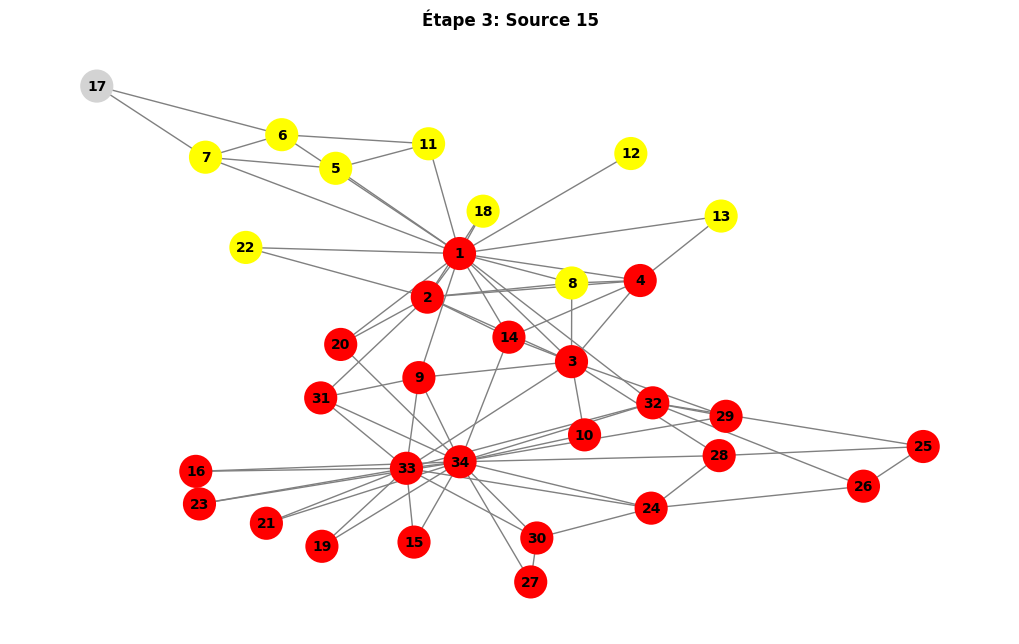

In [11]:
# Chemin trouvé
chemin = [34, 33, 15]

# Visualiser le graphe par étape
visualiser_graphe_par_etape(graphe, chemin)
